Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

In [2]:
# Загрузка данных
df = pd.read_csv("pokemon.csv")

In [3]:
print("Первые 5 строк:")
print(df.head())

Первые 5 строк:
            Name  Total  HP  Attack  Defence  Sp_attack  Sp_defence  Speed
0      Bulbasaur    318  45      49       49         65          65     45
1        Ivysaur    405  60      62       63         80          80     60
2       Venusaur    525  80      82       83        100         100     80
3  Mega Venusaur    625  80     100      123        122         120     80
4     Charmander    309  39      52       43         60          50     65


### Описание признаков полей

Name - Имя покемона<br>
Total - Общая сила покемона<br>
HP - Очки здоровья<br>
Attack - Урон от атаки<br>
Defence - Защита от атак<br>
Sp_attack - Урон от спец атаки<br>
Sp_defence - Защита от спец атак<br>
Speed - Скорость<br>

In [4]:
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB
None


In [5]:
print("\nСтатистика числовых признаков:")
print(df.describe())


Статистика числовых признаков:
             Total           HP       Attack      Defence    Sp_attack  \
count  1045.000000  1045.000000  1045.000000  1045.000000  1045.000000   
mean    439.314833    70.067943    80.466986    74.661244    73.022010   
std     121.970701    26.671411    32.413665    31.237903    32.724797   
min     175.000000     1.000000     5.000000     5.000000    10.000000   
25%     330.000000    50.000000    55.000000    50.000000    50.000000   
50%     458.000000    68.000000    77.000000    70.000000    65.000000   
75%     515.000000    82.000000   100.000000    90.000000    95.000000   
max    1125.000000   255.000000   190.000000   250.000000   194.000000   

        Sp_defence        Speed  
count  1045.000000  1045.000000  
mean     72.288995    68.807656  
std      28.074148    30.210094  
min      20.000000     5.000000  
25%      50.000000    45.000000  
50%      70.000000    65.000000  
75%      90.000000    90.000000  
max     250.000000   200.0000

Выводы:
- Все признаки, кроме Name, числовые.<br>
- Нет пропущенных значений.<br>

### Разведочный анализ (EDA)

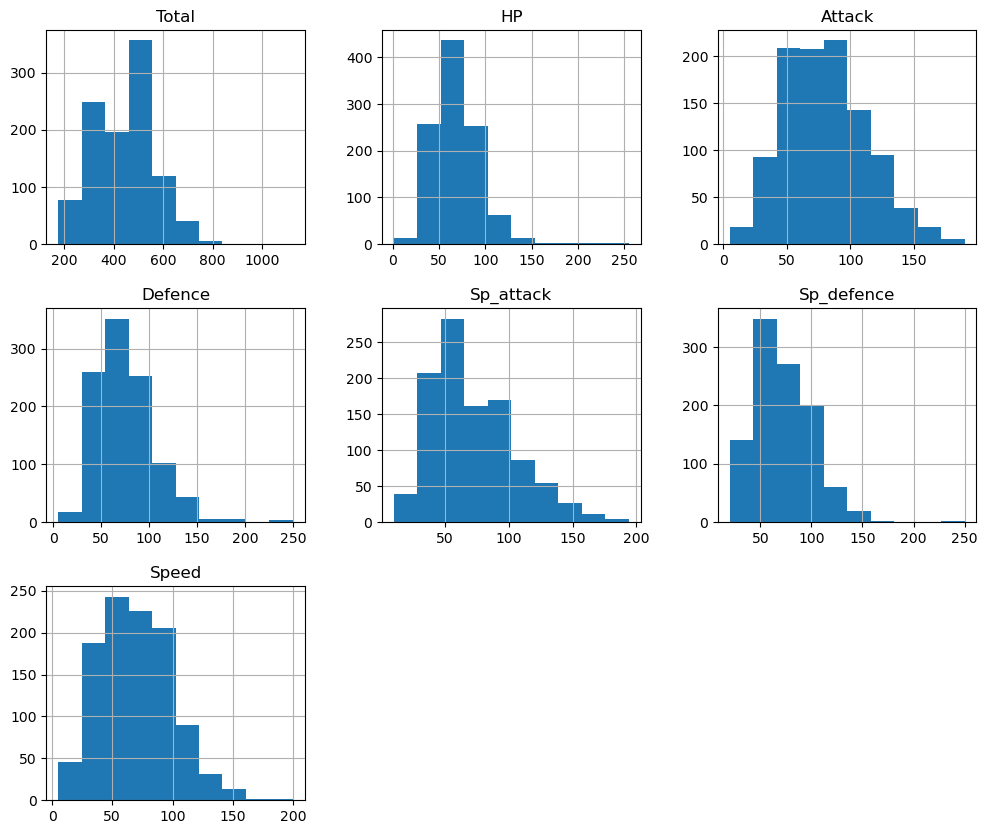

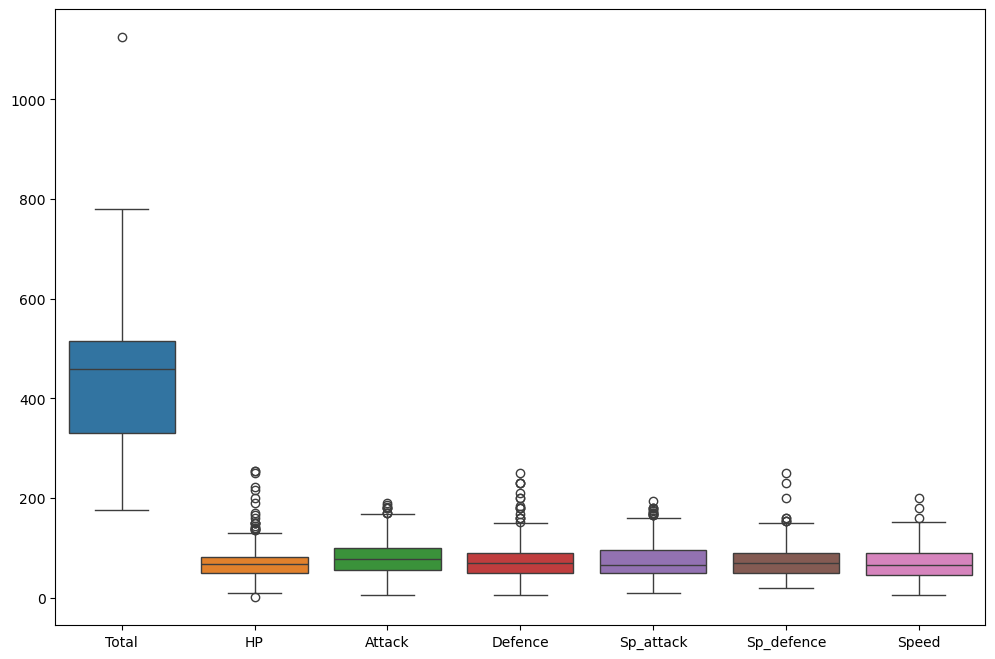

In [6]:
# Гистограммы для числовых переменных
df.hist(figsize=(12, 10))
plt.show()

# Boxplot для числовых переменных
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

Выводы:
- Признаки HP, Attack, Defence имеют близкие к нормальному распределения.
- Speed и Sp_attack имеют правосторонние выбросы.
- Total сильно варьируется (от 195 до 780).

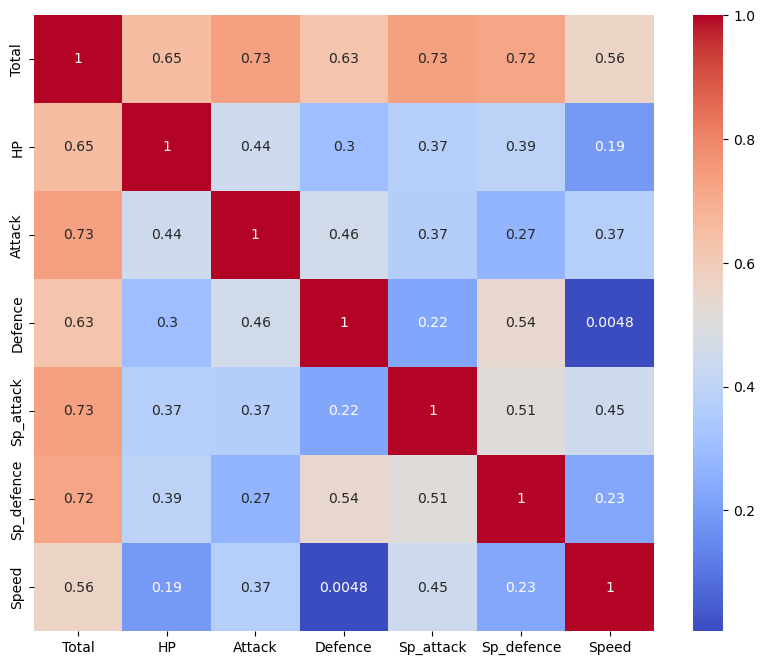

In [7]:
# Матрица корреляций
corr_matrix = df.drop(columns=['Name']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Выводы:
- Total сильно коррелирует с другими признаками (особенно с Sp_attack, Attack, Sp_defence), что логично, так как это суммарный показатель.

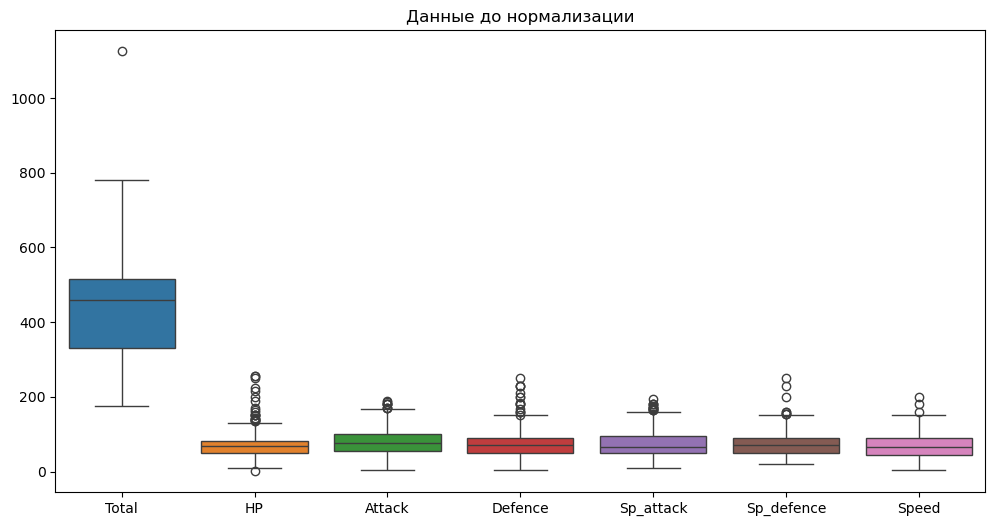

In [8]:
# Проверка распределения до нормализации
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Данные до нормализации")
plt.show()

In [9]:
# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("Name", axis=1))
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[1:])

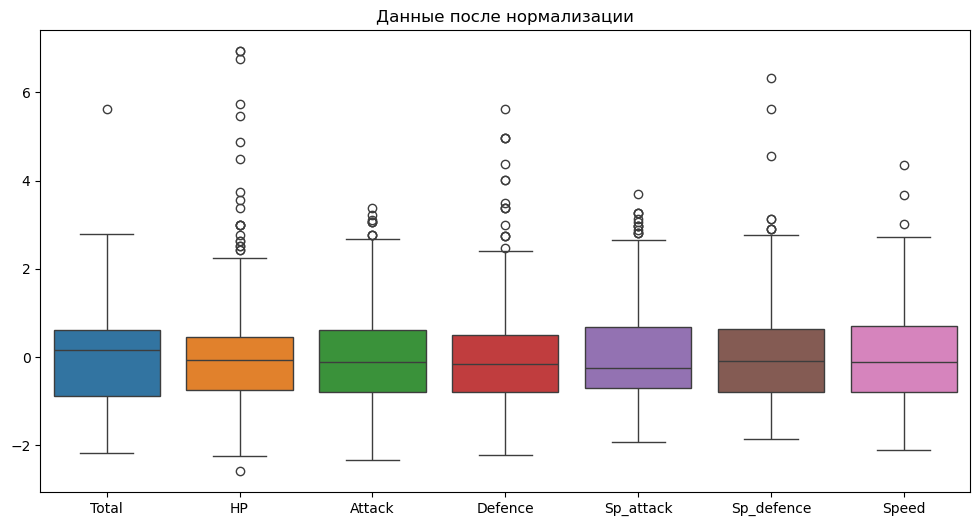

In [10]:
# Проверка распределения после нормализации
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title("Данные после нормализации")
plt.show()

C:\Users\artembruh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\artembruh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\artembruh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\artembruh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\artembruh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid

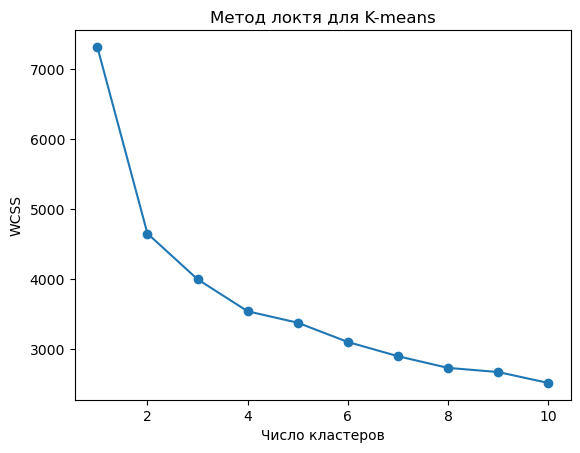

C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


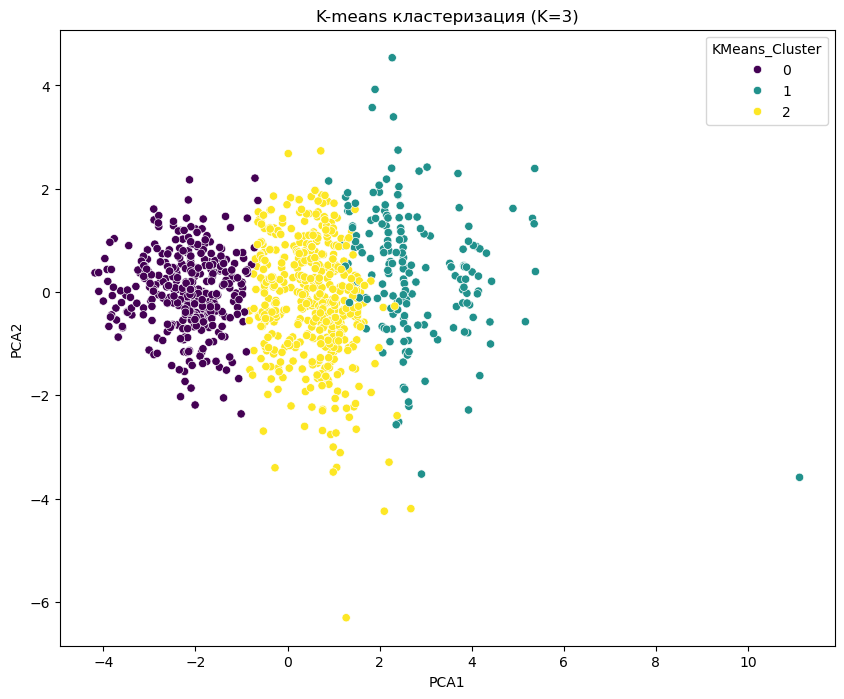

Силуэтный коэффициент (K=3): 0.26


In [11]:
# Определение оптимального числа кластеров (метод локтя)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Метод локтя для K-means")
plt.xlabel("Число кластеров")
plt.ylabel("WCSS")
plt.show()

# Кластеризация с K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)
df["KMeans_Cluster"] = clusters_kmeans

# Визуализация через PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="KMeans_Cluster", data=df, palette="viridis")
plt.title("K-means кластеризация (K=3)")
plt.show()

# Оценка силуэтным коэффициентом
print(f"Силуэтный коэффициент (K=3): {silhouette_score(df_scaled, clusters_kmeans):.2f}")

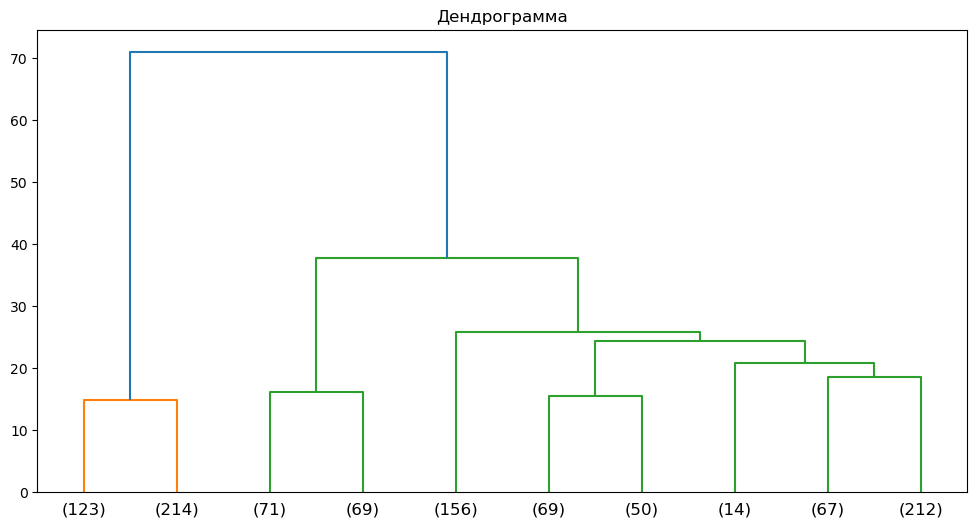

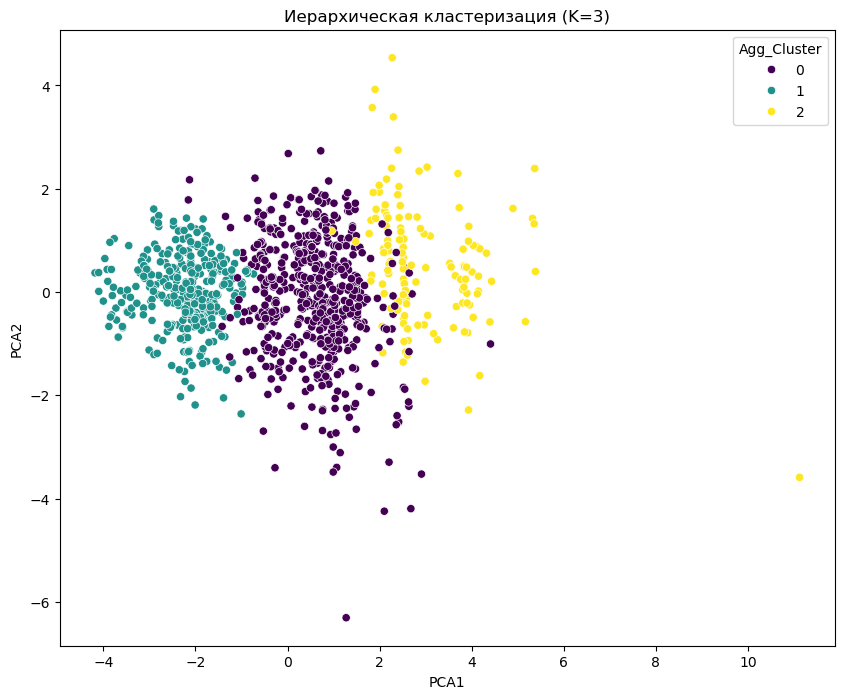

Силуэтный коэффициент (Agg): 0.26


In [12]:
# Построение дендрограммы
linked = linkage(df_scaled, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation="top", truncate_mode="lastp", p=10)
plt.title("Дендрограмма")
plt.show()

# Кластеризация с K=3
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_clustering.fit_predict(df_scaled)
df["Agg_Cluster"] = clusters_agg

# Визуализация
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="Agg_Cluster", data=df, palette="viridis")
plt.title("Иерархическая кластеризация (K=3)")
plt.show()

# Силуэтный коэффициент
print(f"Силуэтный коэффициент (Agg): {silhouette_score(df_scaled, clusters_agg):.2f}")

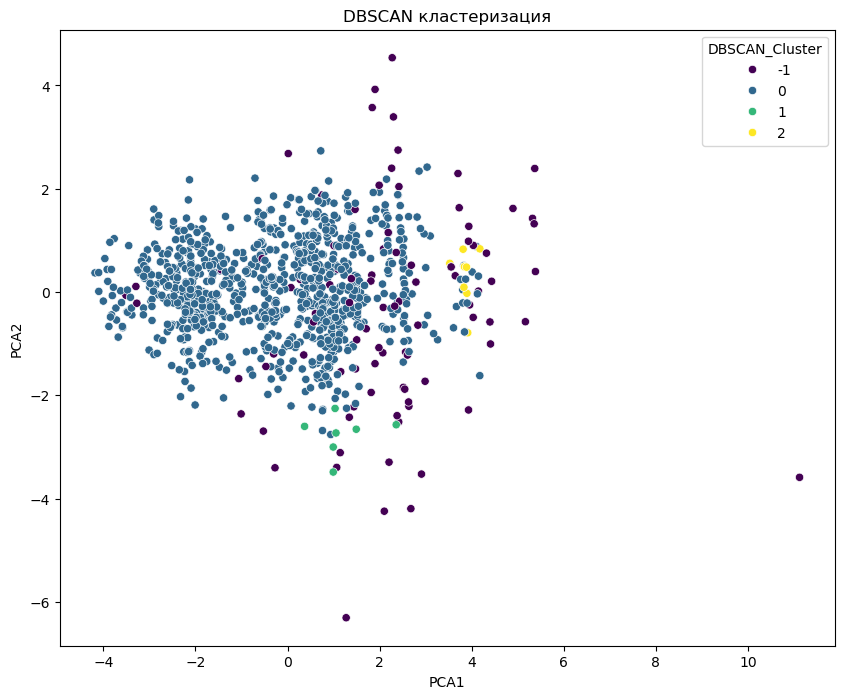

Силуэтный коэффициент (DBSCAN): 0.22


In [27]:
# Кластеризация DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_scaled)
df["DBSCAN_Cluster"] = clusters_dbscan

# Визуализация
plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="DBSCAN_Cluster", data=df, palette="viridis")
plt.title("DBSCAN кластеризация")
plt.show()

# Силуэтный коэффициент (игнорируя шум)
valid_clusters = clusters_dbscan != -1
print(f"Силуэтный коэффициент (DBSCAN): {silhouette_score(df_scaled[valid_clusters], clusters_dbscan[valid_clusters]):.2f}")

In [14]:
# Метрики качества кластеризации
def evaluate_clustering(true_labels, pred_labels, method_name):
    print(f"Метрики для {method_name}:")
    print("Homogeneity:", homogeneity_score(true_labels, pred_labels))
    print("Completeness:", completeness_score(true_labels, pred_labels))
    print("V-measure:", v_measure_score(true_labels, pred_labels))
    print("Adjusted Rand Index:", adjusted_rand_score(true_labels, pred_labels))
    print("Adjusted Mutual Info Score:", adjusted_mutual_info_score(true_labels, pred_labels))
    print("\n")

evaluate_clustering(df['Total'], clusters_kmeans, "K-Means")
evaluate_clustering(df['Total'], clusters_agg, "Agg_Cluster")
evaluate_clustering(df['Total'], clusters_dbscan, "DBSCAN")

Метрики для K-Means:
Homogeneity: 0.19645318447372584
Completeness: 0.9187136533799932
V-measure: 0.3236900824155699
Adjusted Rand Index: 0.03471374408950687
Adjusted Mutual Info Score: 0.2656312500403771


Метрики для Agg_Cluster:
Homogeneity: 0.18351687535013064
Completeness: 0.9113291323470457
V-measure: 0.30551195987031193
Adjusted Rand Index: 0.02727887727790011
Adjusted Mutual Info Score: 0.24766314204514697


Метрики для DBSCAN:
Homogeneity: 0.04014537868105755
Completeness: 0.4927885512970317
V-measure: 0.07424253510119894
Adjusted Rand Index: 9.391355595120148e-05
Adjusted Mutual Info Score: 0.025248482038358288




### Классификация

In [15]:
# Подготовка данных
X = df_scaled
y = df["KMeans_Cluster"]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Обучение и оценка моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       1.00      0.94      0.97        50
           2       0.97      0.99      0.98       161

    accuracy                           0.98       314
   macro avg       0.99      0.97      0.98       314
weighted avg       0.98      0.98      0.98       314

SVM
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.96      0.86      0.91        50
           2       0.95      0.99      0.97       161

    accuracy                           0.97       314
   macro avg       0.97      0.95      0.96       314
weighted avg       0.97      0.97      0.97       314

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       1.00      0.82      0.90        50
           2       0.94      1.